In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
# Load dataset
df = pd.read_csv("03_Wheat_Seeds.csv")

In [5]:
# Check for duplicates
duplicates = df.duplicated()

# Count of duplicate rows
dup_count = duplicates.sum()
print(f"Number of duplicate rows: {dup_count}")

# Display duplicate rows if needed
if dup_count > 0:
    print("\nDuplicate rows:")
    print(df[duplicates])

Number of duplicate rows: 0


In [6]:
# --- 1. Overview ---
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nBasic Stats:\n", df.describe())

Shape: (199, 8)

Missing values:
 Area              0
Perimeter         0
Compactness       0
Length            0
Width             0
AsymmetryCoeff    0
Groove            0
Type              0
dtype: int64

Basic Stats:
              Area   Perimeter  Compactness      Length       Width  \
count  199.000000  199.000000   199.000000  199.000000  199.000000   
mean    14.918744   14.595829     0.870811    5.643151    3.265533   
std      2.919976    1.310445     0.023320    0.443593    0.378322   
min     10.590000   12.410000     0.808100    4.899000    2.630000   
25%     12.330000   13.470000     0.857100    5.267000    2.954500   
50%     14.430000   14.370000     0.873400    5.541000    3.245000   
75%     17.455000   15.805000     0.886800    6.002000    3.564500   
max     21.180000   17.250000     0.918300    6.675000    4.033000   

       AsymmetryCoeff      Groove        Type  
count      199.000000  199.000000  199.000000  
mean         3.699217    5.420653    1.994975  
std

C:\Users\chris\AppData\Local\Temp\ipykernel_14500\2272018075.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Type", palette="viridis")


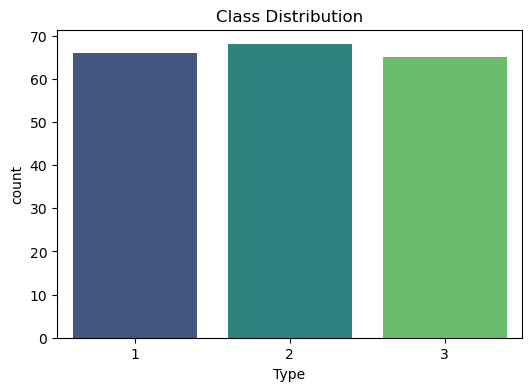

In [5]:
# --- 2. Target Variable Distribution ---
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Type", palette="viridis")
plt.title("Class Distribution")
plt.show()

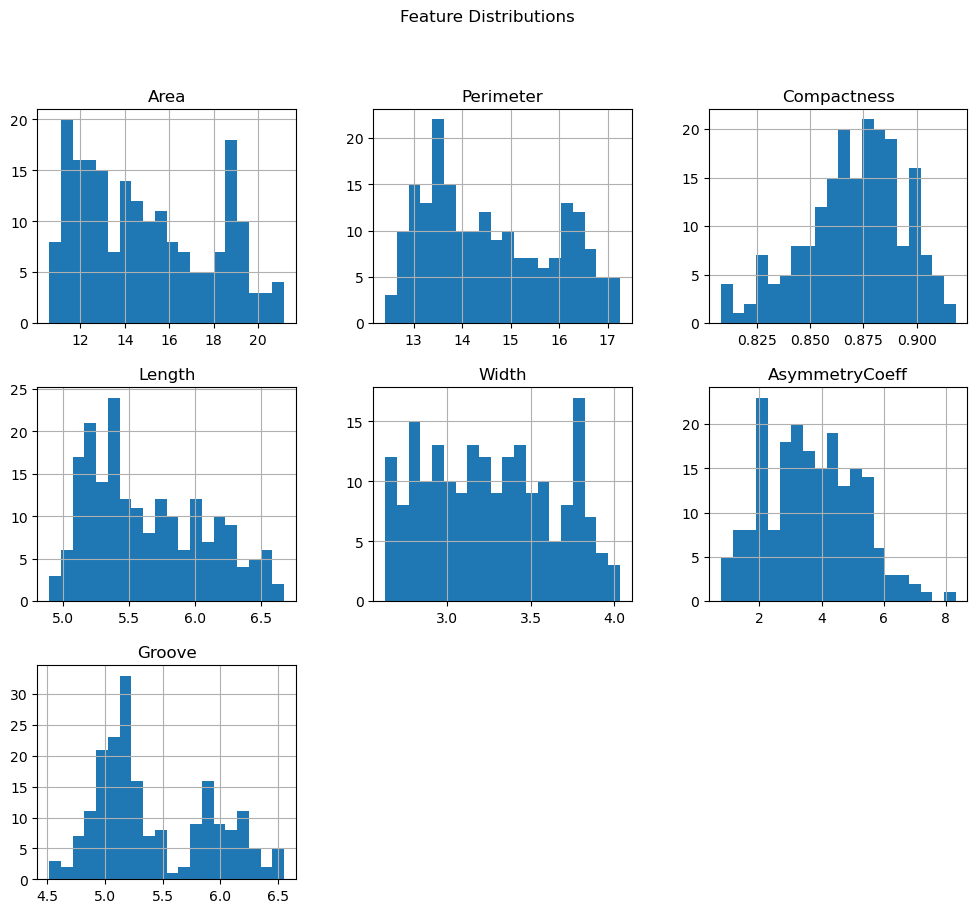

In [6]:
# --- 3. Univariate Analysis ---
df.drop(columns="Type").hist(figsize=(12,10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

C:\Users\chris\AppData\Local\Temp\ipykernel_14500\290468326.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Type", y=col, palette="Set2")
C:\Users\chris\AppData\Local\Temp\ipykernel_14500\290468326.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Type", y=col, palette="Set2")
C:\Users\chris\AppData\Local\Temp\ipykernel_14500\290468326.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Type", y=col, palette="Set2")
C:\Users\chris\AppData\Local\Temp\ipykernel_14500\290468326.py:5: FutureWarning: 

Pa

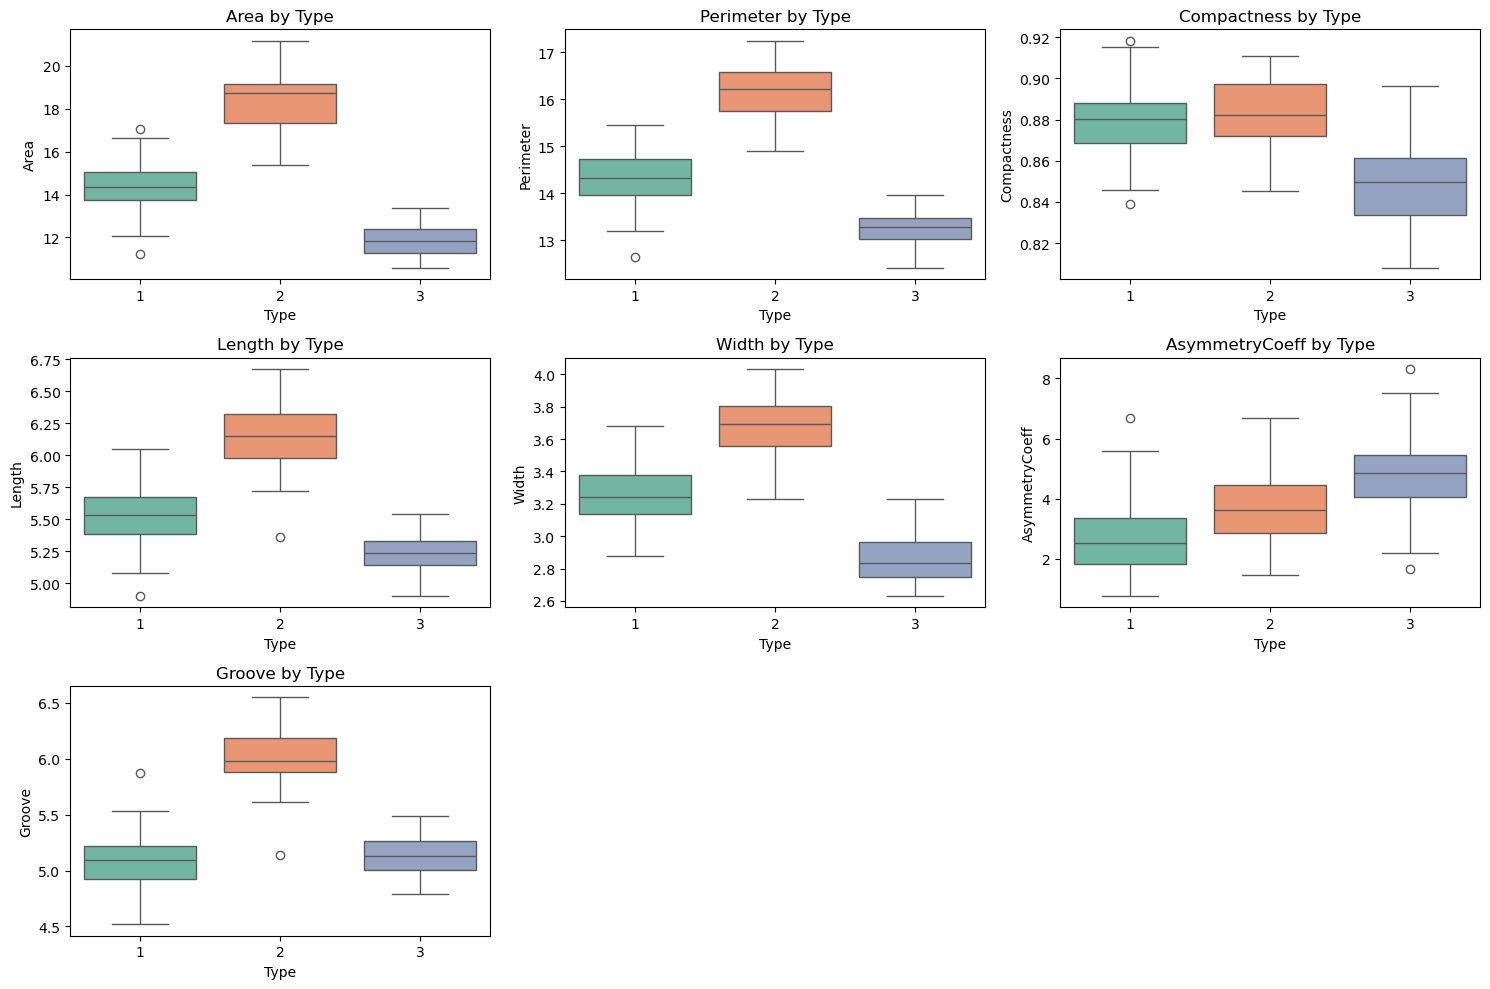

In [7]:
# --- 4. Boxplots by Type ---
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(3,3,i)
    sns.boxplot(data=df, x="Type", y=col, palette="Set2")
    plt.title(f"{col} by Type")
plt.tight_layout()
plt.show()

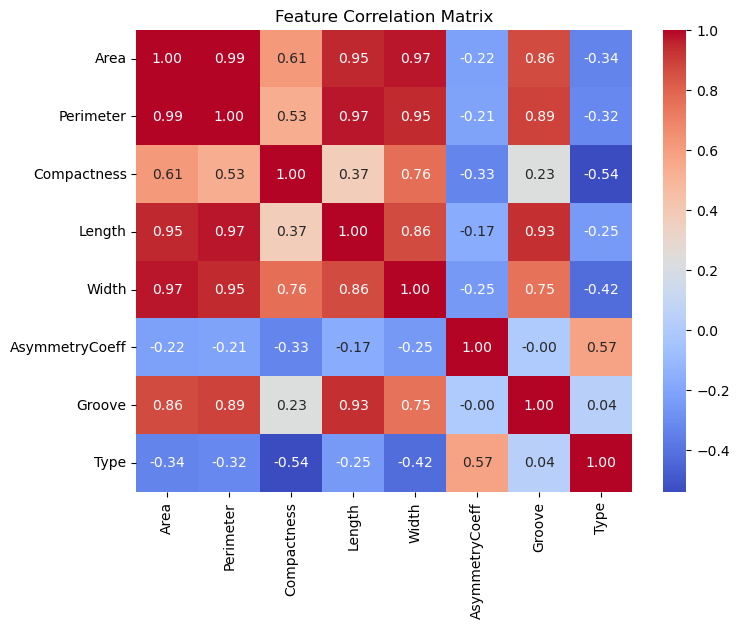


Top 10 absolute correlations (excluding duplicates & self):
Area ↔ Perimeter : 0.99
Length ↔ Perimeter : 0.97
Area ↔ Width : 0.97
Area ↔ Length : 0.95
Perimeter ↔ Width : 0.95
Groove ↔ Length : 0.93
Groove ↔ Perimeter : 0.89
Area ↔ Groove : 0.86
Length ↔ Width : 0.86
Compactness ↔ Width : 0.76


In [14]:
# --- 5. Correlation Matrix ---
plt.figure(figsize=(8,6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# --- Find top 10 highest absolute correlations ---
corr_matrix_abs = corr_matrix.abs()
np.fill_diagonal(corr_matrix_abs.values, np.nan)  # remove self-correlations

# Unstack and drop NaNs
corr_pairs = corr_matrix_abs.unstack().dropna()

# Sort each pair alphabetically to treat (A,B) same as (B,A)
corr_pairs.index = [tuple(sorted(pair)) for pair in corr_pairs.index]

# Drop duplicates
corr_pairs = corr_pairs[~corr_pairs.index.duplicated()]

# Sort descending and take top 10
top_10 = corr_pairs.sort_values(ascending=False).head(10)

print("\nTop 10 absolute correlations (excluding duplicates & self):")
for (col1, col2), value in top_10.items():
    print(f"{col1} ↔ {col2} : {value:.2f}")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


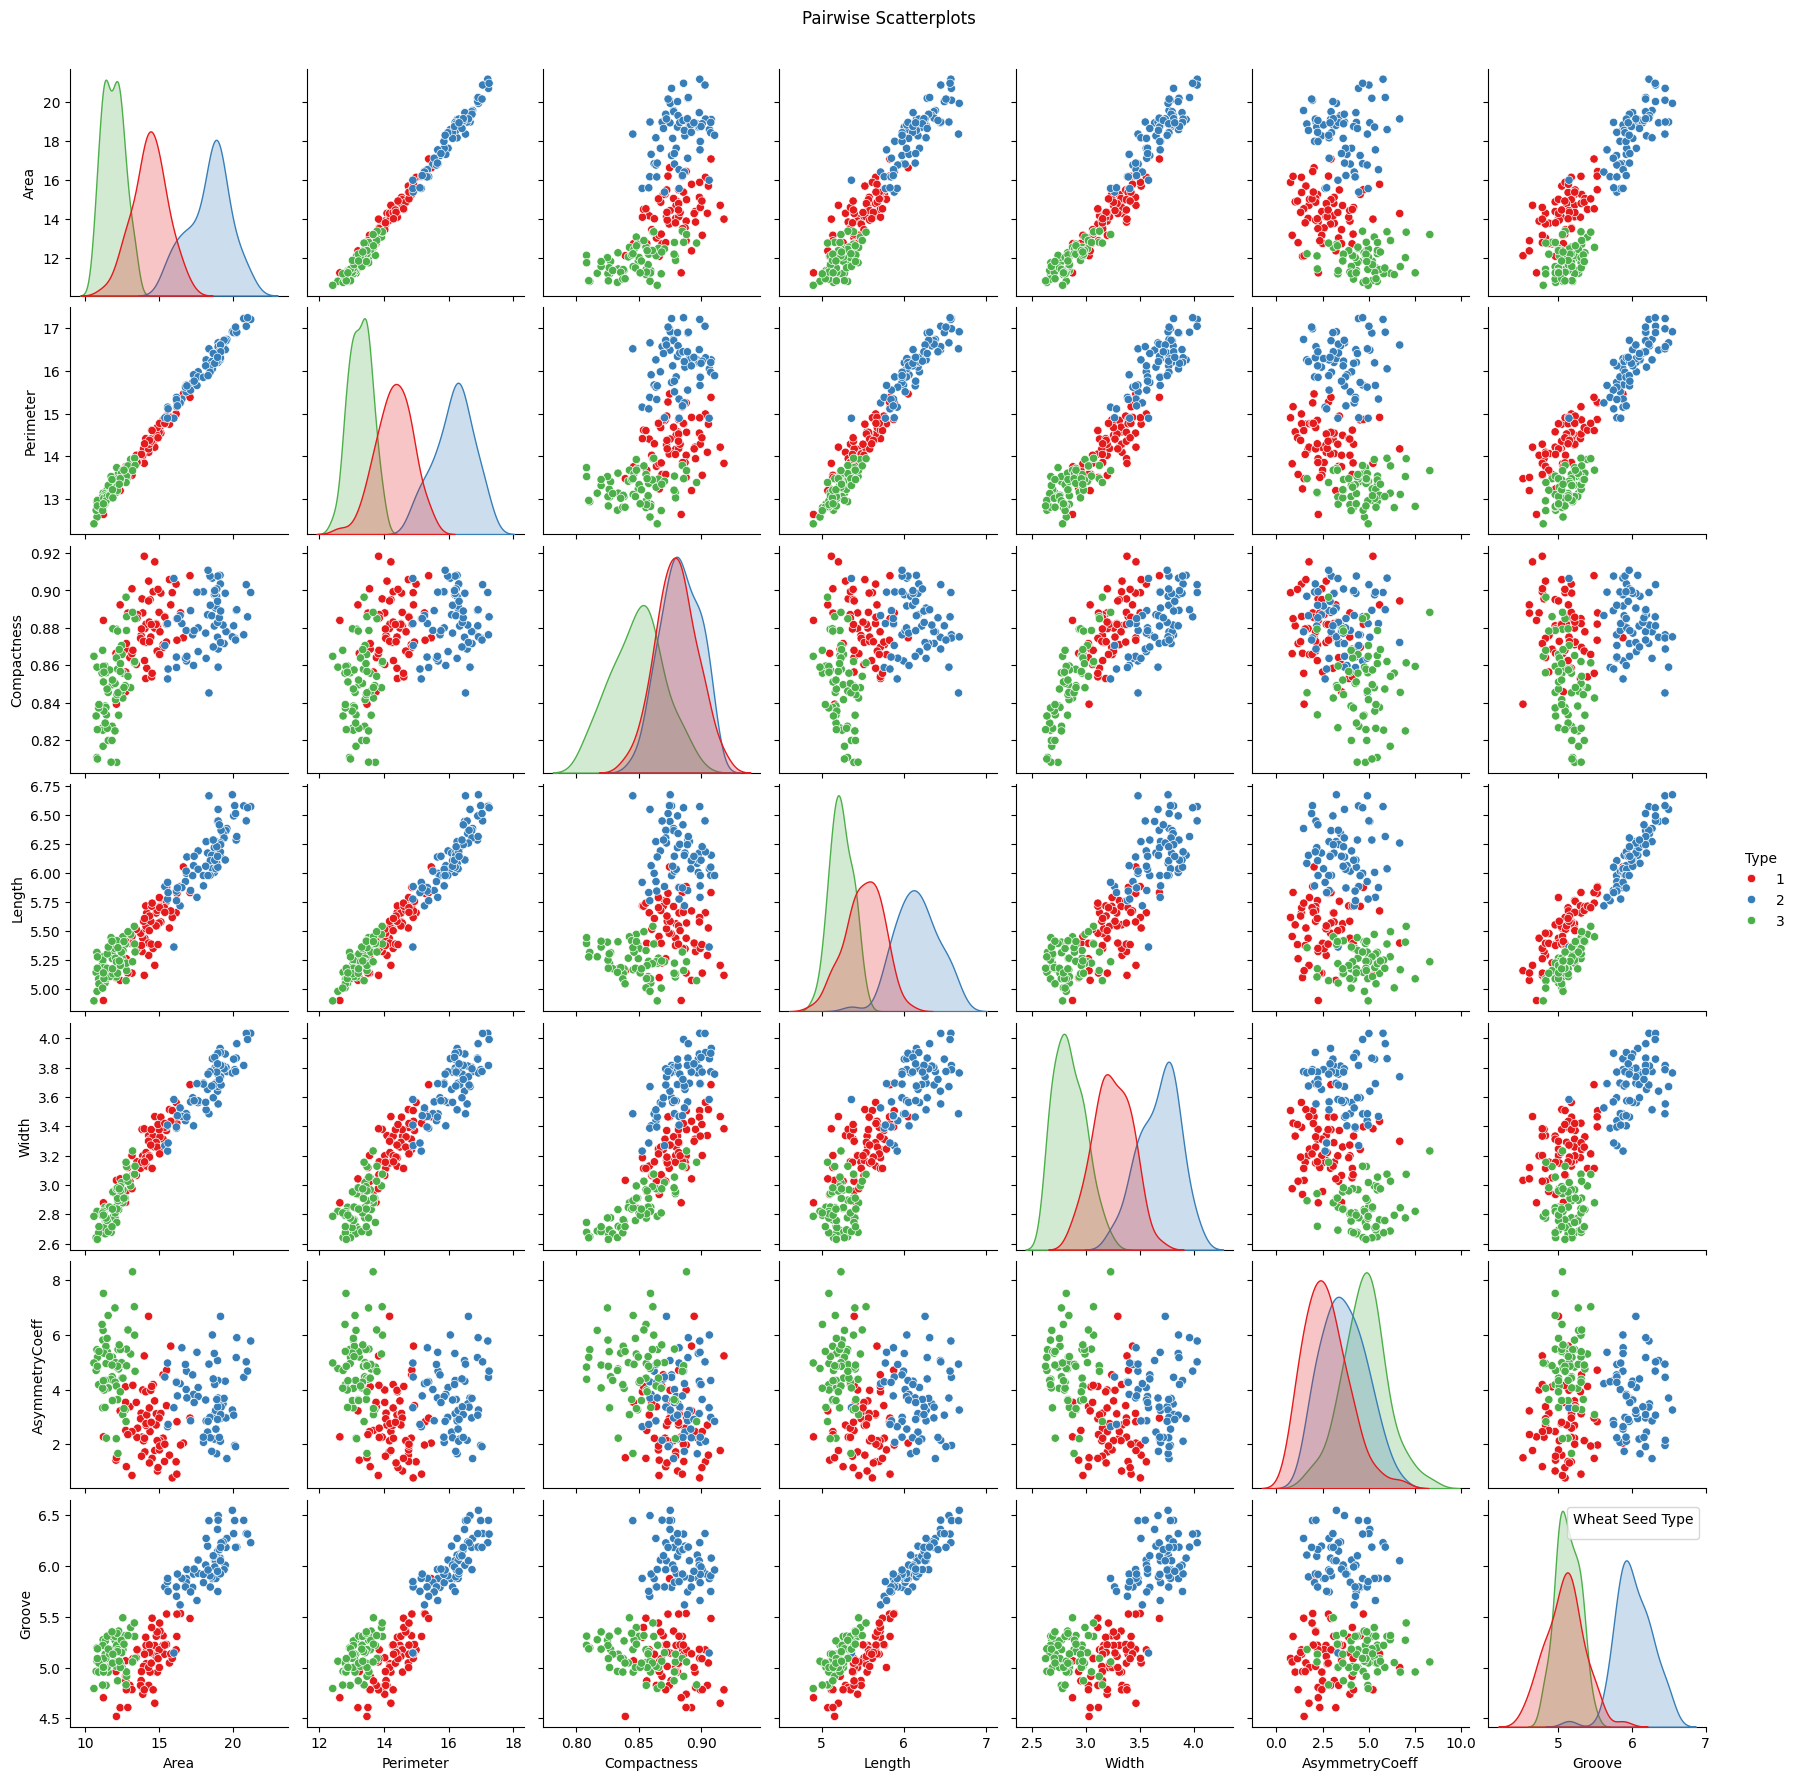

In [8]:
# --- 6. Pairplot ---
sns.pairplot(df, hue="Type", diag_kind="kde", palette="Set1")
plt.suptitle("Pairwise Scatterplots", y=1.02)
plt.legend(title="Wheat Seed Type")
plt.show()

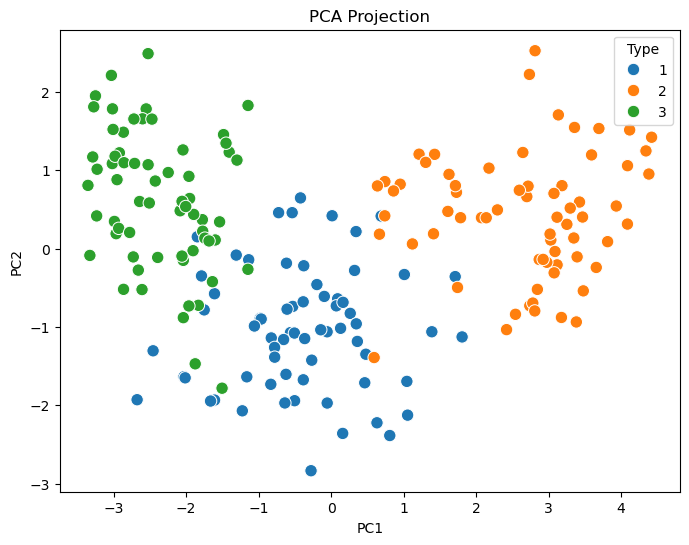

In [10]:
# --- 7. PCA for Dimensionality Reduction ---
features = df.drop(columns="Type")
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["Type"] = df["Type"]

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Type", palette="tab10", s=80)
plt.title("PCA Projection")
plt.show()